## Classification

Most common supervised learning tasks are 
1) Regression (predicting values)
2) Classification (predicting values)

We are going to work on MNIST dataset. This dataset has 70000 small images of digits handwritten. Each image is labeled with digit it represents.

importing MNIST dataset using Scikit-Learn.

In [1]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
# Alternative method to load MNIST, if mldata.org is down
from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"],mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

There are 70000 images, each image has 784 features. Each feature is between 0 to 255.We can visualize them using matplotlib 

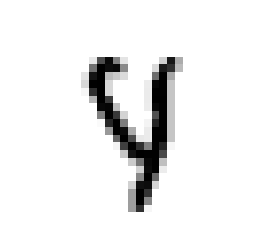

In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


some_digit = X[25000]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,
          interpolation = "nearest")

plt.axis("off")
plt.show()

In [12]:
y[25000]

4.0

Splitting the training and testing set

In [33]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Now shuffle the training set, this will gurantee that all cross-validation folds will similar.

In [34]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

Now we are going to create a Binary Classifier. This will detect is our number is 4 or not

In [35]:
y_train_4 = (y_train==4)
y_test_4 = (y_test==4)

In [36]:
y_train_4

array([False,  True, False, ..., False,  True, False])

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [38]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation 

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_4,cv=4,scoring = "accuracy")

array([0.97800147, 0.96313579, 0.97186479, 0.97086472])

It looks it is a great accuracy, but the classifier is just predicting it is 4 or not. There are only 90% of data is not 4. That means if we predict everything as not 4 then classifier is 90% accurate. So accuracy is not the best measure for the performance. So now we will cosntruct Confusion Matrix

### Confusion Matrix

In [43]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_score(sgd_clf,X_train,y_train_4,cv=4)
y_train_pred

array([0.97220139, 0.96965   , 0.97544877])